In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('D:\College\REG EX\Dataset\Titanic\Train.csv')
test_data = pd.read_csv('D:\College\REG EX\Dataset\Titanic\Test.csv')

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [9]:
avg_age = train_data['Age'].mean()
train_data['Age'].replace(np.nan,avg_age,inplace=True)
avg_age = test_data['Age'].mean()
test_data['Age'].replace(np.nan,avg_age,inplace=True)

In [10]:
freq_port = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(freq_port)

In [11]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [13]:
avg_fare = test_data['Fare'].mean()
test_data['Fare'].replace(np.nan,avg_age,inplace=True)

In [14]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

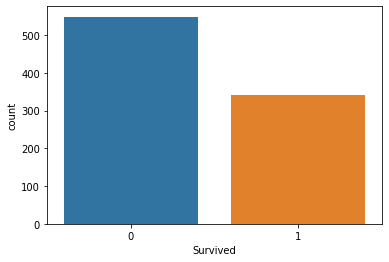

In [15]:
sns.countplot(x='Survived' , data=train_data)  # here 0 is dead , 1 is alive

<AxesSubplot:xlabel='Survived', ylabel='count'>

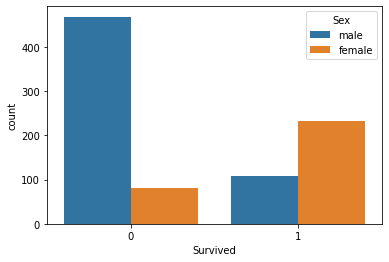

In [16]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

In [17]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women=sum(women)/len(women)*100
print('Percentage of women survivors: ',rate_women)

Percentage of women survivors:  74.20382165605095


In [18]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men=sum(men)/len(men)*100
print('Percentage of women survivors: ',rate_men)

Percentage of women survivors:  18.890814558058924


<AxesSubplot:xlabel='Pclass', ylabel='count'>

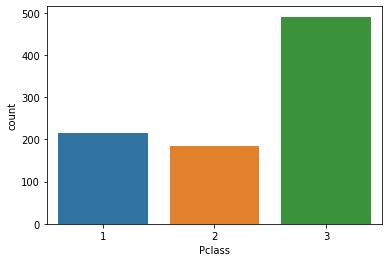

In [19]:
sns.countplot(x='Pclass',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

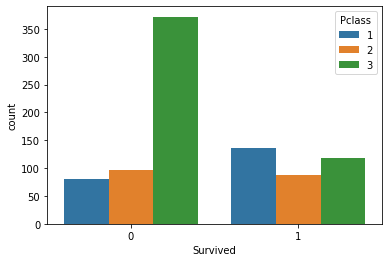

In [20]:
sns.countplot(x='Survived',hue='Pclass' ,data=train_data)

In [21]:
first_class = train_data.loc[train_data.Pclass == 1]['Survived']
rate_fc = sum(first_class)/len(first_class) *100
print('Percentage of first class survivors: ',rate_fc)

Percentage of first class survivors:  62.96296296296296


In [22]:
second_class = train_data.loc[train_data.Pclass == 2]['Survived']
rate_fc = sum(second_class)/len(second_class) *100
print('Percentage of second class survivors: ',rate_fc)

Percentage of second class survivors:  47.28260869565217


In [23]:
third_class = train_data.loc[train_data.Pclass == 3]['Survived']
rate_fc = sum(third_class)/len(third_class) *100
print('Percentage of third class survivors: ',rate_fc)

Percentage of third class survivors:  24.236252545824847
